# Importing

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler, PowerTransformer
from sklearn.impute import SimpleImputer
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, RandomForestClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.svm import SVC
import numpy as np
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

In [2]:
train_df = pd.read_csv('data/train.csv')
test_df = pd.read_csv('data/test.csv')
df = pd.concat([train_df, test_df])

# EDA

In [3]:
train_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [4]:
train_df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [5]:
train_df.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [6]:
train_df.corr()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
Age,1.000000,0.068723,0.130421,0.033133,0.123970,0.101007,-0.075026
RoomService,0.068723,1.000000,-0.015889,0.054480,0.010080,-0.019581,-0.244611
FoodCourt,0.130421,-0.015889,1.000000,-0.014228,0.221891,0.227995,0.046566
ShoppingMall,0.033133,0.054480,-0.014228,1.000000,0.013879,-0.007322,0.010141
Spa,0.123970,0.010080,0.221891,0.013879,1.000000,0.153821,-0.221131
VRDeck,0.101007,-0.019581,0.227995,-0.007322,0.153821,1.000000,-0.207075
Transported,-0.075026,-0.244611,0.046566,0.010141,-0.221131,-0.207075,1.000000


(array([8.156e+03, 2.540e+02, 6.500e+01, 1.700e+01, 9.000e+00, 9.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([    0. ,  1432.7,  2865.4,  4298.1,  5730.8,  7163.5,  8596.2,
        10028.9, 11461.6, 12894.3, 14327. ]),
 <BarContainer object of 10 artists>)

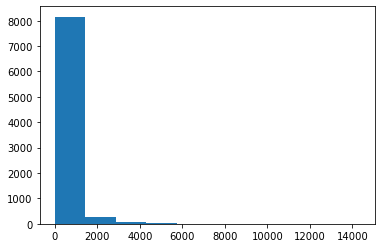

In [7]:
plt.hist(train_df['RoomService'])

# Feature Engineering

## Categorical Variables

In [8]:
mean_imputer = SimpleImputer(strategy='mean')
median_imputer = SimpleImputer(strategy='median')
constant_imputer = SimpleImputer(strategy='constant', fill_value=-99999)
frequent_imputer = SimpleImputer(strategy='most_frequent')

In [9]:
df[['PassengerGroup', 'PassengerNumber']] = df['PassengerId'].str.split('_', 1, expand=True)

In [10]:
df['PassengerGroup'] = df['PassengerGroup'].astype(int)
df['PassengerNumber'] = df['PassengerNumber'].astype(int)

In [11]:
df[['CabinDeck', 'CabinNumber', 'CabinSide']] = df['Cabin'].str.split('/', expand=True)

In [12]:
cd = pd.get_dummies(df['CabinDeck'], prefix = 'cd')
df = pd.concat([df, cd], axis=1)

In [13]:
df['CabinNumber'] = df['CabinNumber'].astype(float)

In [14]:
cs = pd.get_dummies(df['CabinSide'], prefix = 'cs', drop_first=True)
df = pd.concat([df, cs], axis=1)

In [15]:
hp = pd.get_dummies(df['HomePlanet'], prefix = 'hp')
df = pd.concat([df, hp], axis=1)

In [16]:
le = LabelEncoder()

In [17]:
df[['CryoSleep', 'VIP']] = frequent_imputer.fit_transform(df[['CryoSleep', 'VIP']])
df['CryoSleep']= le.fit_transform(df['CryoSleep'])

In [18]:
dest = pd.get_dummies(df['Destination'], prefix = 'dest')
df = pd.concat([df, dest], axis=1)

In [19]:
df['HomePlanet']= le.fit_transform(df['HomePlanet'])
df['CabinDeck']= le.fit_transform(df['CabinDeck'])
df['CabinSide']= le.fit_transform(df['CabinSide'])
df['VIP']= le.fit_transform(df['VIP'])
df['Destination']= le.fit_transform(df['Destination'])

In [20]:
df['Transported']= le.fit_transform(df['Transported'])

In [21]:
df[['FirstName', 'LastName']] = df['Name'].str.split(' ', 1, expand=True)

In [22]:
df['NameLength'] = df['Name'].str.len()
df['FirstNameLength'] = df['FirstName'].str.len()
df['LastNameLength'] = df['LastName'].str.len()


In [23]:
df['IsPlanet'] = df['HomePlanet'].replace({'Earth': 1, 'Mars': 1, 'Europa': 0})

# Nulls

In [24]:
train = df[df['PassengerId'].isin(train_df['PassengerId'])]
test = df[df['PassengerId'].isin(test_df['PassengerId'])]
train = train.copy()
test = test.copy()

In [25]:
train[['HomePlanet', 'CryoSleep', 'CabinDeck', 'CabinNumber', 'CabinSide', 'Destination', 'VIP']] = frequent_imputer.fit_transform(train[['HomePlanet', 'CryoSleep', 'CabinDeck', 'CabinNumber', 'CabinSide', 'Destination', 'VIP']])
test[['HomePlanet', 'CryoSleep', 'CabinDeck', 'CabinNumber', 'CabinSide', 'Destination', 'VIP']] = frequent_imputer.transform(test[['HomePlanet', 'CryoSleep', 'CabinDeck', 'CabinNumber', 'CabinSide', 'Destination', 'VIP']])

train[['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']] = median_imputer.fit_transform(train[['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']])
test[['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']] = median_imputer.transform(test[['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']])

train[['FirstNameLength', 'LastNameLength', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']] = mean_imputer.fit_transform(train[['FirstNameLength', 'LastNameLength', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']])
test[['FirstNameLength', 'LastNameLength', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']] = mean_imputer.transform(test[['FirstNameLength', 'LastNameLength', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']])


# Numerical Variables

In [26]:
ss = StandardScaler()

In [27]:
train[['PassengerGroup', 'PassengerNumber', 'FirstNameLength', 'LastNameLength', 'CabinNumber']] = ss.fit_transform(train[['PassengerGroup', 'PassengerNumber', 'FirstNameLength', 'LastNameLength', 'CabinNumber']])
test[['PassengerGroup', 'PassengerNumber', 'FirstNameLength', 'LastNameLength', 'CabinNumber']] = ss.transform(test[['PassengerGroup', 'PassengerNumber', 'FirstNameLength', 'LastNameLength', 'CabinNumber']])


In [28]:
log = PowerTransformer()

In [29]:
train[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Age']] = log.fit_transform(train[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Age']])
test[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Age']] = log.transform(test[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Age']])

In [30]:
train.corr()['Transported']


HomePlanet            0.107755
CryoSleep             0.460132
Destination          -0.104817
Age                  -0.085662
VIP                  -0.037261
RoomService          -0.354961
FoodCourt            -0.194208
ShoppingMall         -0.236285
Spa                  -0.357400
VRDeck               -0.338478
Transported           1.000000
PassengerGroup        0.021491
PassengerNumber       0.066390
CabinDeck            -0.109925
CabinNumber          -0.044012
CabinSide             0.093319
cd_A                 -0.002623
cd_B                  0.144733
cd_C                  0.108193
cd_D                 -0.034046
cd_E                 -0.097965
cd_F                 -0.087753
cd_G                  0.016269
cd_T                 -0.014568
cs_S                  0.101455
hp_Earth             -0.169019
hp_Europa             0.176916
hp_Mars               0.019544
dest_55 Cancri e      0.108722
dest_PSO J318.5-22    0.000092
dest_TRAPPIST-1e     -0.094700
NameLength            0.005057
FirstNam

## Feature Selection

In [31]:
train = train[['PassengerGroup', 'PassengerNumber', 'CryoSleep', 'Age', 'VIP', 'CabinNumber', 'cd_B', 'cd_C', 'cd_D', 'cd_E', 'cd_F', 'cd_G', 'cd_T', 'cs_S', 'hp_Earth', 'hp_Europa', 'dest_55 Cancri e', 'dest_TRAPPIST-1e', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Transported']]
test = test[['PassengerGroup', 'PassengerNumber', 'CryoSleep', 'Age', 'VIP', 'CabinNumber', 'cd_B', 'cd_C', 'cd_D', 'cd_E', 'cd_F', 'cd_G', 'cd_T', 'cs_S', 'hp_Earth', 'hp_Europa', 'dest_55 Cancri e', 'dest_TRAPPIST-1e', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Transported']]

In [32]:
y = train['Transported']
X = train.drop('Transported', axis=1)

# Applying ML Models

In [33]:
gbc = GradientBoostingClassifier(random_state=42)
lr = LogisticRegression(random_state=42)
xgboost = xgb.XGBClassifier(random_state=42)
ab = AdaBoostClassifier(random_state=42)
rf = RandomForestClassifier(random_state=42)
svc = SVC(kernel = 'rbf', random_state=42)
cb = CatBoostClassifier(verbose=0, random_state=42)
lgbm = LGBMClassifier(verbose=0, random_state=42)

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [35]:
gbc.fit(X_train, y_train)
lr.fit(X_train, y_train)
xgboost.fit(X_train, y_train)
ab.fit(X_train, y_train)
rf.fit(X_train, y_train)
svc.fit(X_train, y_train)
cb.fit(X_train, y_train)
lgbm.fit(X_train, y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.016203 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.


LGBMClassifier(random_state=42, verbose=0)

In [36]:
y_pred_gbc = gbc.predict(X_test)
y_pred_lr = lr.predict(X_test)
y_pred_xgboost = xgboost.predict(X_test)
y_pred_ab = ab.predict(X_test)
y_pred_rf = rf.predict(X_test)
y_pred_svc = svc.predict(X_test)
y_pred_cb = cb.predict(X_test)
y_pred_lgbm = lgbm.predict(X_test)

In [37]:
print(confusion_matrix(y_test, y_pred_gbc))

[[647 214]
 [139 739]]


In [38]:
print(confusion_matrix(y_test, y_pred_lr))

[[655 206]
 [208 670]]


In [39]:
print(confusion_matrix(y_test, y_pred_xgboost))

[[679 182]
 [189 689]]


In [40]:
print(confusion_matrix(y_test, y_pred_ab))

[[642 219]
 [159 719]]


In [41]:
print(confusion_matrix(y_test, y_pred_rf))

[[704 157]
 [198 680]]


In [42]:
print(confusion_matrix(y_test, y_pred_svc))

[[660 201]
 [204 674]]


In [43]:
print(confusion_matrix(y_test, y_pred_cb))

[[675 186]
 [158 720]]


In [44]:
print(confusion_matrix(y_test, y_pred_lgbm))

[[681 180]
 [161 717]]


In [45]:
accuracy_score(y_test, y_pred_gbc)

0.79700977573318

In [46]:
accuracy_score(y_test, y_pred_lr)

0.7619321449108684

In [47]:
accuracy_score(y_test, y_pred_xgboost)

0.7866589994249569

In [48]:
accuracy_score(y_test, y_pred_ab)

0.7826336975273146

In [49]:
accuracy_score(y_test, y_pred_rf)

0.7958596894767107

In [50]:
accuracy_score(y_test, y_pred_svc)

0.7671075330649799

In [51]:
accuracy_score(y_test, y_pred_cb)

0.8021851638872916

In [52]:
accuracy_score(y_test, y_pred_lgbm)

0.8039102932719954

# Hyperparameter Tuning

In [53]:
params = {'eta':[0], 'max_depth': [5, 7, 8], 'gamma': [2], 'min_child_weight': [9, 10, 11], 'colsample_bytree': [0.6]}

In [54]:
#gsxgb = GridSearchCV(xgboost, param_grid=params, scoring='accuracy', cv=5, verbose=3)
gsxgb = xgb.XGBClassifier(eta=0, max_depth=5, gamma=2, min_child_weight=9, colsample_bytree=0.6)

In [55]:
gsxgb.fit(X, y)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.6,
              early_stopping_rounds=None, enable_categorical=False, eta=0,
              eval_metric=None, feature_types=None, gamma=2, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=5, max_leaves=0, min_child_weight=9, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_parallel_tree=1, predictor='auto', ...)

In [56]:
#gsxgb.best_score_

In [57]:
#gsxgb.best_params_

# Model Stacking

In [58]:
estimators = [('gbc', gbc), ('xgboost', xgboost), ('ab', ab), ('rf', rf), ('svc', svc), ('cb', cb), ('lgbm', lgbm), ('lsvc', SVC(kernel = 'linear', random_state=42))]

In [59]:
stacked = StackingClassifier(estimators=estimators, passthrough=True)

In [60]:
stacked.fit(X, y)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000475 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000300 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000386 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002824 seconds.
You can set `f

/home/matheus/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


StackingClassifier(estimators=[('gbc',
                                GradientBoostingClassifier(random_state=42)),
                               ('xgboost',
                                XGBClassifier(base_score=0.5, booster='gbtree',
                                              callbacks=None,
                                              colsample_bylevel=1,
                                              colsample_bynode=1,
                                              colsample_bytree=1,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric=None,
                                              feature_types=None, gamma=0,
                                              gpu_id=-1,
                                              grow_policy='depthwise',
                                              importa...
                                              num_parallel_tree=1,
                                              predictor='auto', random_state=42, ...)),
                               ('ab', AdaBoostClassifier(random_state=42)),
                               ('rf', RandomForestClassifier(random_state=42)),
                               ('svc', SVC(random_state=42)),
                               ('cb',
                                <catboost.core.CatBoostClassifier object at 0x7fdf872b3490>),
                               ('lgbm',
                                LGBMClassifier(random_state=42, verbose=0)),
                               ('lsvc', SVC(kernel='linear', random_state=42))],
                   passthrough=True)

In [61]:
y_pred_stacked = stacked.predict(X_test)

In [62]:
accuracy_score(y_test, y_pred_stacked)

0.9120184013801035

In [63]:
print(confusion_matrix(y_test, y_pred_stacked))

[[780  81]
 [ 72 806]]


In [64]:
0.948821161587119

0.948821161587119

# Preparing submission

In [69]:
y_submission = pd.DataFrame(lgbm.predict(test.drop('Transported', axis=1)), columns=['Transported'])

In [70]:
y_submission['PassengerId'] = test_df['PassengerId']
y_submission = y_submission[['PassengerId', 'Transported']]

In [71]:
y_submission['Transported'].replace({0: 'False', 1: 'True'}, inplace=True)

In [72]:
y_submission.to_csv('output/spaceship_titanic.csv', index=False)